In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./dataPreprocessed.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,848,849,850,851,852,853,854,855,856,857
0,-0.104383,-0.774381,-0.723237,-0.728497,-0.312177,-0.841625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.110383,-0.774381,-0.723237,-0.728497,1.214743,0.825169,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.007584,0.941010,1.516077,0.370133,0.852806,1.185399,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.106987,0.369213,1.343822,0.254988,0.498189,0.719133,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.110387,-0.774381,-0.723237,-0.728497,0.883411,0.463485,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df.iloc[:,-1] = df.iloc[:,-1].astype('int64')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,848,849,850,851,852,853,854,855,856,857
0,-0.104383,-0.774381,-0.723237,-0.728497,-0.312177,-0.841625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.110383,-0.774381,-0.723237,-0.728497,1.214743,0.825169,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.007584,0.941010,1.516077,0.370133,0.852806,1.185399,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.106987,0.369213,1.343822,0.254988,0.498189,0.719133,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.110387,-0.774381,-0.723237,-0.728497,0.883411,0.463485,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics 
# from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc, f1_score
# from scipy import interp
%matplotlib inline 

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

y_pred = kmeans.predict(X)
accuracy = accuracy_score(Y, y_pred)
print('Accuracy of KMeans classifier on test set: {0}\n'.format(accuracy))

Accuracy of KMeans classifier on test set: 0.5837229374955045



In [6]:
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.84      0.67     27806
           1       0.67      0.33      0.44     27806

    accuracy                           0.58     55612
   macro avg       0.61      0.58      0.55     55612
weighted avg       0.61      0.58      0.55     55612



Text(0.5,1,'Kmeans Classifier')

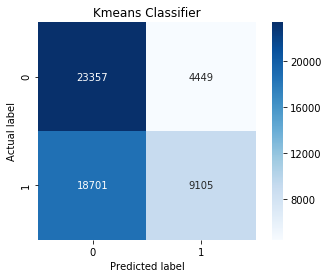

In [7]:
import seaborn as sns

sns.heatmap(confusion_matrix(Y, y_pred), annot=True, fmt=".0f", square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Kmeans Classifier')

In [8]:
from sklearn.utils import resample

dfDownsample = resample(df, replace=True, n_samples= 1000, random_state=17) 
dfDownsample = dfDownsample.reset_index(drop=True)

ndf = dfDownsample.iloc[:, 0:-1]
label = dfDownsample.iloc[:, -1]

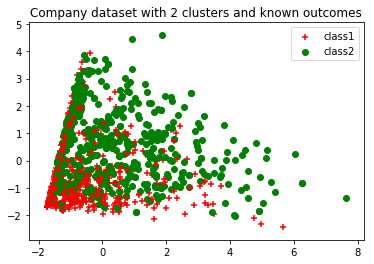

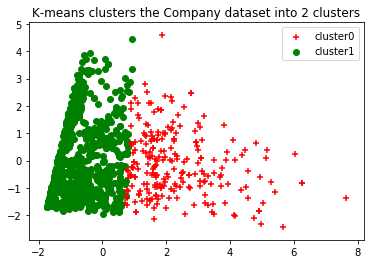

In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pylab as pl

pca = PCA(n_components=2).fit(ndf)
pca_2d = pca.transform(ndf)

for i in range(0, pca_2d.shape[0]):
    if label[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif label[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
pl.legend([c1, c2], ['class1', 'class2'])
pl.title('Company dataset with 2 clusters and known outcomes')
pl.show()

kmeans = KMeans(n_clusters=2, random_state=17)
kmeans.fit(ndf)

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
pl.legend([c1, c2],['cluster0','cluster1'])
pl.title('K-means clusters the Company dataset into 2 clusters')
pl.show()

In [10]:
pca = PCA(n_components=10)
pca.fit(X)  
arr = pca.explained_variance_ratio_ 

sum = 0
for i in range(len(arr)):
    sum += arr[i]
    
print(sum)

0.7483555511879464
